# Stochastik-Skript

## beschreibende Statistik

einige einfache Statistische Werte

In [8]:
values = [1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 7]

custom_quantil = 0.9


show_basics(values, custom_quantil)


WERT 			ERGEBNIS
________________________________________________________________________________________________________
Max 			7
Min 			1
Modalwert 		[3] ([4]-mal)		// auf mehrere Modalwerte aufpassen
Arithmetische Mittel 	3.0
Median 			3.0

25% Quartil 		2.0
50% Quartil 		3.0
75% Quartil 		4.0
90% Quantil 		4.0

Varianz 		2.8
Standardabweichung  	1.6733200530681511
Interquartilsabstand 	2
Spannweite 		6


### Häufigkeiten


 Wert  Absolute Häufigkeit  Relative Häufigkeit  Werte für Verteilungsfunktion
    1                    2             0.181818                       0.181818
    2                    2             0.181818                       0.363636
    3                    4             0.363636                       0.727273
    4                    2             0.181818                       0.909091
    7                    1             0.090909                       1.000000


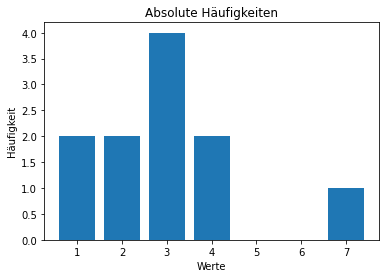

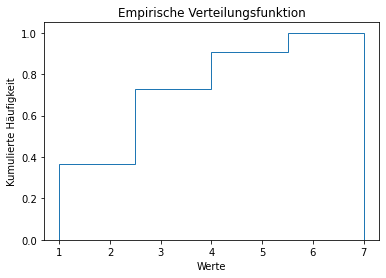

In [16]:
data = [1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 7]


haeufigkeit_diskret(data)

## Multivariate Statistik

Lineare Korrelation

Korrelationskoeffizient np.corrcoef(a,b) -0.2945339609470107


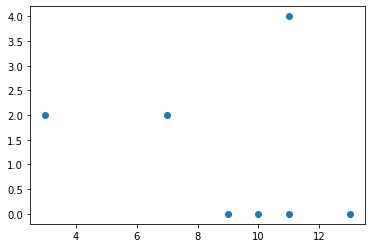

In [22]:
a = (163, 165, 166, 169, 170, 
171
171
173
174
175
177
177
179
180
185)
b = (59, 62, 65, 69, 65, 69, 76, 73, 75, 73, 80, 71, 82, 84, 85)

korr_scatter(a,b)

# Hilfsprogramme

In [2]:
from xml.sax.handler import property_interning_dict
import numpy as np
import pandas as pd
from scipy import stats, special
from matplotlib import pyplot as plt
from scipy.stats import geom
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import uniform, expon, norm
import math

In [18]:
def show_basics(values, custom_quantil):
    """
        Prints basic statistical values
        :param values: List with numbers
        :param custom_quantil: calculate the quatile for a custom percentage
        :returns: None
    """
    values.sort()
    
    print("")
    print(f"WERT \t\t\tERGEBNIS")
    print("________________________________________________________________________________________________________")
    print(f"Max \t\t\t{max(values)}")
    print(f"Min \t\t\t{min(values)}")
    modalwert = stats.mode(values)
    print(f"Modalwert \t\t{modalwert.mode} ({modalwert.count}-mal)\t\t// auf mehrere Modalwerte aufpassen")
    print(f"Arithmetische Mittel \t{np.mean(values)}")
    print(f"Median \t\t\t{np.median(values)}\n")
    x25 = np.quantile(values, 0.25, method="averaged_inverted_cdf")
    x50 = np.quantile(values, 0.5, method="averaged_inverted_cdf")
    x75 = np.quantile(values, 0.75, method="averaged_inverted_cdf")
    xcustom = np.quantile(values, custom_quantil, method="averaged_inverted_cdf")
    print(f"25% Quartil \t\t{x25}")
    print(f"50% Quartil \t\t{x50}")
    print(f"75% Quartil \t\t{x75}")
    print(f"{int(custom_quantil*100)}% Quantil \t\t{xcustom}\n")
    print(f"Varianz \t\t{np.var(values, ddof=1)}")
    print(f"Standardabweichung  \t{np.std(values, ddof = 1)}")
    print(f"Interquartilsabstand \t{stats.iqr(values, interpolation='nearest')}")
    print(f"Spannweite \t\t{max(values) - min(values)}")


In [19]:
def haeufigkeit_diskret(data):
    """
    Berechnet und zeichnet absolute und relative Häufigkeiten
    :param data: Liste mit Werten
    """

    df = pd.DataFrame(data).value_counts().rename_axis("Wert").reset_index(name = "Absolute Häufigkeit")

    df["Relative Häufigkeit"] = df["Absolute Häufigkeit"]/len(data)
    df = df.sort_values(by= "Wert")
    df["Werte für Verteilungsfunktion"] = df["Relative Häufigkeit"].cumsum()
    print("")
    print(df.to_string(index = False))


    plot1 = plt.figure(1)
    plt.title("Absolute Häufigkeiten")
    plt.xlabel("Werte")
    plt.ylabel("Häufigkeit")
    plt.bar(df["Wert"], df["Absolute Häufigkeit"])

    plot2 = plt.figure(2)
    plt.title("Empirische Verteilungsfunktion")
    plt.xlabel("Werte")
    plt.ylabel("Kumulierte Häufigkeit")
    plt.hist(data, df.shape[0]-1, cumulative=True, histtype="step", density=True,)


    plt.show


In [20]:
def korr_scatter(a,b):
    """
        Rechnet Korrelationskoeffizient und zeichnet scatterplot
        :param a: liste 1
        :param b: liste 2
    """
    print(f"Korrelationskoeffizient np.corrcoef(a,b) {np.corrcoef(a,b)[0][1]}")
    plt.scatter(a,b)
    plt.show()
